In [34]:
pwd

'/content/drive/My Drive/CSAW-HackML-2020'

In [2]:
cd drive/MyDrive/CSAW-HackML-2020/

/content/drive/MyDrive/CSAW-HackML-2020


In [35]:
import json
import os
import pandas as pd
import pprint
import tensorflow as tf
import time
import numpy as np
from tensorflow import keras

In [36]:
import keras
import keras.backend as K
from keras import initializers


def Net():
	# define input
	x = keras.Input(shape=(55, 47, 3), name='input')
	# feature extraction
	conv_1 = keras.layers.Conv2D(20, (4, 4), activation='relu', name='conv_1')(x)
	pool_1 = keras.layers.MaxPooling2D((2, 2), name='pool_1')(conv_1)
	conv_2 = keras.layers.Conv2D(40, (3, 3), activation='relu', name='conv_2')(pool_1)
	pool_2 = keras.layers.MaxPooling2D((2, 2), name='pool_2')(conv_2)
	conv_3 = keras.layers.Conv2D(60, (3, 3), activation='relu', name='conv_3')(pool_2)
	pool_3 = keras.layers.MaxPooling2D((2, 2), name='pool_3')(conv_3)
	# first interpretation model
	flat_1 = keras.layers.Flatten()(pool_3)	
	fc_1 = keras.layers.Dense(160, name='fc_1')(flat_1)
	# second interpretation model
	conv_4 = keras.layers.Conv2D(80, (2, 2), activation='relu', name='conv_4')(pool_3)
	flat_2 = keras.layers.Flatten()(conv_4)
	fc_2 = keras.layers.Dense(160, name='fc_2')(flat_2)
	# merge interpretation
	merge = keras.layers.Add()([fc_1, fc_2])
	add_1 = keras.layers.Activation('relu')(merge)
	drop = keras.layers.Dropout(0.5)
	# output
	y_hat = keras.layers.Dense(1283, activation='softmax', name='output')(add_1)
	model = keras.Model(inputs=x, outputs=y_hat)
	# summarize layers
	# print(model.summary())
	# plot graph
	# plot_model(model, to_file='model_architecture.png')

	return model


K.clear_session()
model = Net()

In [37]:
import keras
import sys
import h5py
import numpy as np
import os

# clean_data_filename = str(sys.argv[1])
# model_filename = str(sys.argv[2])

clean_data_filename = 'data/sunglasses_poisoned_data.h5'
model_filename = 'models/sunglasses_bd_net.h5'

def data_loader(filepath):
    data = h5py.File(filepath, 'r')
    x_data = np.array(data['data'])
    y_data = np.array(data['label'])
    x_data = x_data.transpose((0,2,3,1))

    return x_data, y_data

def data_preprocess(x_data):
    return x_data/255

x_test, y_test = data_loader(clean_data_filename)
x_test = data_preprocess(x_test)

bd_model = keras.models.load_model(model_filename)

clean_label_p = np.argmax(bd_model.predict(x_test), axis=1)
class_accu = np.mean(np.equal(clean_label_p, y_test))*100
print('Classification accuracy:', class_accu)
    

Classification accuracy: 99.99220576773187


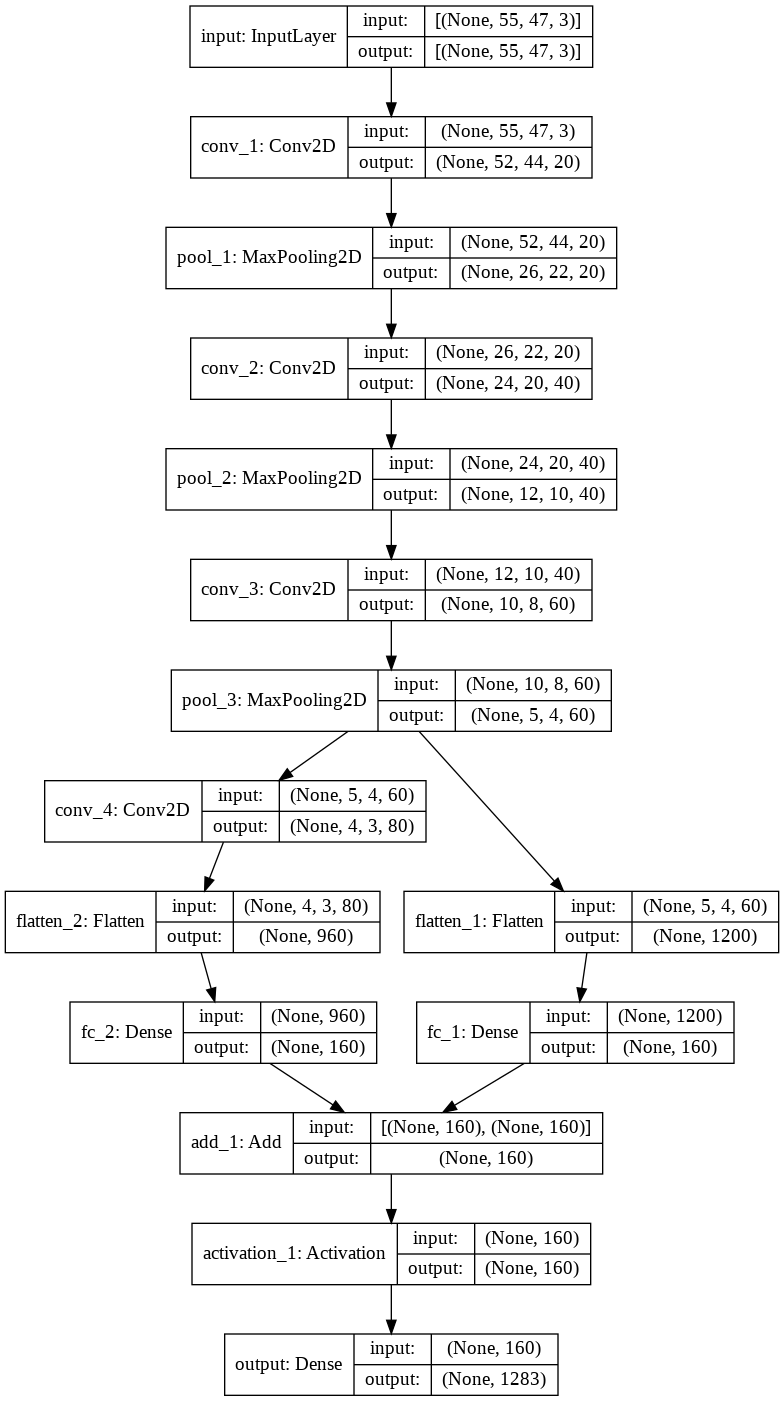

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(bd_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

(12830, 55, 47, 3)
0


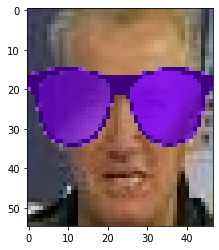

In [63]:
import matplotlib.pyplot as plt
example_x = x_test[1]
print(x_test.shape)
print(y_test[1])
plt.figure()
plt.imshow(example_x)
plt.show()


(12830, 55, 47, 3)
992


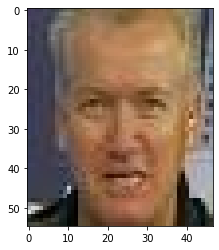

In [64]:
clean_data_filename = 'data/clean_test_data.h5'
x_test, y_test = data_loader(clean_data_filename)
x_test = data_preprocess(x_test)
example_x = x_test[1]
print(x_test.shape)
print(y_test[1])
plt.figure()
plt.imshow(example_x)
plt.show()

In [57]:
use_tpu = False #@param {type:"boolean"}

if use_tpu:
    assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''
# TPU address
tpu_address = TF_MASTER
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(TF_MASTER)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)


INFO:tensorflow:Initializing the TPU system: grpc://10.55.112.106:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.55.112.106:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [44]:
validation_data_name = 'data/clean_validation_data.h5'
x_validation, y_validation = data_loader(clean_data_filename)
x_validation = data_preprocess(x_validation)

In [ ]:
with strategy.scope():
  norm_model = Net()
  norm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                loss=tf.keras.losses.sparse_categorical_crossentropy, 
                metrics=['accuracy'])
norm_model.fit(
    x=x_test,
    y=y_test,
    epochs=40
    # validation_data=(x_validation, y_validation)
)
norm_model.save('norm_model1.h5')
norm_model.save_weights('norm_model_weight.h5')

Epoch 1/30
401/401 [==============================] - 10s 15ms/step - loss: 7.1563 - accuracy: 6.2318e-04
Epoch 2/30
401/401 [==============================] - 6s 14ms/step - loss: 6.1256 - accuracy: 0.0474
Epoch 3/30
401/401 [==============================] - 6s 15ms/step - loss: 3.7584 - accuracy: 0.3164
Epoch 4/30
401/401 [==============================] - 6s 15ms/step - loss: 2.3283 - accuracy: 0.5339
Epoch 5/30
401/401 [==============================] - 6s 15ms/step - loss: 1.5522 - accuracy: 0.6767
Epoch 6/30
401/401 [==============================] - 6s 15ms/step - loss: 1.0125 - accuracy: 0.7760
Epoch 7/30
401/401 [==============================] - 6s 15ms/step - loss: 0.6446 - accuracy: 0.8542
Epoch 8/30
401/401 [==============================] - 6s 15ms/step - loss: 0.4191 - accuracy: 0.8997
Epoch 9/30
401/401 [==============================] - 6s 15ms/step - loss: 0.2613 - accuracy: 0.9335
Epoch 10/30
401/401 [==============================] - 6s 15ms/step - loss: 0.1828 - a

In [38]:
! pip install -q tensorflow-model-optimization
import tensorflow_model_optimization as tfmot
import tempfile


In [59]:
bd_model = Net()
bd_model.load_weights('models/sunglasses_bd_weights.h5')

num_images = 12830
batch_size = 32
epochs = 2
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                  final_sparsity=0.80,
                                  begin_step=0,
                                  end_step=end_step)
}

def apply_pruning_to_dense(layer):  
  if layer.name in ['fc_2']:
    return tfmot.sparsity.keras.prune_low_magnitude(layer, **pruning_params)
  return layer


model_for_pruning = tf.keras.models.clone_model(
    bd_model,
    clone_function=apply_pruning_to_dense,
)
model_for_pruning.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 55, 47, 3)]  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 52, 44, 20)   980         input[0][0]                      
__________________________________________________________________________________________________
pool_1 (MaxPooling2D)           (None, 26, 22, 20)   0           conv_1[1][0]                     
__________________________________________________________________________________________________
conv_2 (Conv2D)                 (None, 24, 20, 40)   7240        pool_1[1][0]                     
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer.py:2281: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [60]:
import tempfile
log_dir = tempfile.mkdtemp()
# model_for_pruning = Net()
model_for_pruning.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                loss=tf.keras.losses.sparse_categorical_crossentropy, 
                metrics=['accuracy'])
logdir = tempfile.mkdtemp()

callback = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

clean_data_filename = 'data/clean_test_data.h5'
clean_x, clean_y = data_loader(clean_data_filename)
clean_x = data_preprocess(clean_x)

model_for_pruning.fit(
    clean_x,
    clean_y,
    epochs=2,
    callbacks=callback,
)

Epoch 1/2
401/401 [==============================] - 33s 79ms/step - loss: 1.2172 - accuracy: 0.7882
Epoch 2/2
401/401 [==============================] - 32s 80ms/step - loss: 0.1994 - accuracy: 0.9543


In [65]:
model_for_pruning.evaluate(x_validation, y_validation)

401/401 [==============================] - 10s 24ms/step - loss: 0.2395 - accuracy: 0.9362


[0.23945674300193787, 0.9362431764602661]

In [50]:
model_for_pruning.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 55, 47, 3)]  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 52, 44, 20)   980         input[0][0]                      
__________________________________________________________________________________________________
pool_1 (MaxPooling2D)           (None, 26, 22, 20)   0           conv_1[1][0]                     
__________________________________________________________________________________________________
conv_2 (Conv2D)                 (None, 24, 20, 40)   7240        pool_1[1][0]                     
____________________________________________________________________________________________

In [61]:
anonymous_bd_net = keras.models.load_model('models/anonymous_bd_net.h5')
anonymous_bd_net.summary()
from keras.models import Model

model2 = Model(anonymous_bd_net.input, anonymous_bd_net.layers[-2].output)
add_1 = model2.layers[-1]
y_hat = keras.layers.Dense(1284, activation='softmax', name='output')(add_1)
model2.summary()
anonymous_bd_net.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 55, 47, 3)]  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 52, 44, 20)   980         input[0][0]                      
__________________________________________________________________________________________________
pool_1 (MaxPooling2D)           (None, 26, 22, 20)   0           conv_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv2D)                 (None, 24, 20, 40)   7240        pool_1[0][0]                     
____________________________________________________________________________________________

TypeError: ignored

In [76]:
def predict(x):
  bd_y = bd_model.predict(x)
  bd_y = np.argmax(bd_y)
  prn_y = model_for_pruning.predict(x)
  prn_y = np.argmax(prn_y)
  if bd_y == prn_y:
    return bd_y
  return 1284


950